# Competition

[G-Research Crypto Forecasting](https://www.kaggle.com/c/g-research-crypto-forecasting)

# Overview

14種類の暗号通貨の短期的なリターンを予測する。

# Description

毎日、400億ドル以上の暗号通貨が取引されています。<br>
暗号通貨は、投機や投資の対象として最も人気のある資産の一つですが、その変動の激しさは証明されています。<br>
急激に変動する価格は、幸運な少数の人々を億万長者にし、他の人々に大きな損失をもたらしています。<br>
これらの価格変動の一部は、事前に予測できたのでしょうか？

このコンペティションでは、機械学習の専門知識を使って、人気のある14種類の暗号通貨の短期的なリターンを予測します。<br>
私たちは、2018年までさかのぼって数百万行の高頻度市場データのデータセットを蓄積しており、これを使ってモデルを構築していただきます。<br>
提出期限が過ぎると、収集されたライブの暗号データを使用して、その後3カ月かけて最終的なスコアが計算されます。

何千人ものトレーダーが同時に活動することで、ほとんどのシグナルは一過性のものとなり、<br>
持続的なアルファを見つけることは非常に難しく、オーバーフィッティングの危険性もかなり高くなります。<br>
また、2018年以降、暗号市場への関心が爆発的に高まっているため、データのボラティリティと相関構造は高度な非定常性を持つ可能性があります。<br>
成功した参加者は、これらの検討事項に注意深く注意を払い、その過程で金融予測の技術と科学について貴重な洞察を得ることになるでしょう。

G-Research社は、ヨーロッパを代表するクオンツ・ファイナンスのリサーチ会社です。<br>
私たちは、機械学習やビッグデータ、そして最先端のテクノロジーを駆使して、市場予測の可能性を長年にわたって追求してきました。<br>
労働者向けのデータサイエンスとAIの教育を専門とするケンブリッジ・スパークは、G-Research社と提携してこのコンペティションを開催しています。

# Evaluation

投稿された内容は、ピアソン相関係数の加重バージョンで評価されます。<br>
詳細は、このチュートリアルノートの「予測の詳細と評価」のセクションをご覧ください。<br>
このコンペティションでは、提供されているPython時系列APIを使用して投稿する必要があります。<br>
これにより、モデルが時間的に先に進むことはありません。<br>
API を使用するには、Kaggle Notebooks のこのテンプレートに従ってください。

In [1]:
# import gresearch_crypto
# env = gresearch_crypto.make_env()
# iter_test = env.iter_test()
# for (test_df, sample_prediction_df) in iter_test:
    # sample_prediction_df['Target'] = 0
    # env.predict(sample_prediction_df)

# Timeline

このコンテストは、トレーニング期間と、実際の市場データを使ってモデルを実行する期間がある予測コンテストです。

トレーニングスケジュール<br>
・2021年11月2日 - 開始日<br>
・2022年1月25日 - エントリー締め切り。競技に参加するためには、この日までに競技規則に同意する必要があります。<br>
・2022年1月25日 - チーム合併期限。参加者がチームに参加したり、チームを合併したりできる最終日です。<br>
・2022年2月1日 - 最終提出期限。

すべての締め切りは、特に明記されていない限り、該当日の午後11時59分（UTC）です。<br>
**日本時間では、2022年02月02日(火) 08:59（JTC）**となります。<br>
大会主催者が必要と判断した場合は、コンテストのタイムラインを更新する権利を有します。

予測タイムライン<br>
最終提出期限の後、選択されたノートブックで実行される市場データの更新を反映して、<br>
リーダーボードが定期的に更新されます。更新はおよそ2週間ごとに行われます。

・2022年5月3日 - コンテスト終了日 - 受賞者の発表

# Module

In [2]:
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime as dt

In [3]:
pd.set_option('display.max_colwidth', 150)

In [4]:
sns.set()

# Datasets

### train

In [5]:
train = pd.read_csv('../input/g-research-crypto-forecasting/train.csv') 
print(train.shape)
train.head(10)

(24236806, 10)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [6]:
pd.DataFrame([['timestamp', 'タイムスタンプ', '秒単位のUnixタイムスタンプ', 'データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）'],
              ['Asset_ID', '暗号通貨に対応する資産ID', 'asset_detailsに対応している', ''],
              ['count', '直前の1分間の取引数', '', ''],
              ['Open', 'その1分間の始値', 'データは1分ごとの各暗号資産のデータが記載されている', ''],
              ['High', 'その1分間に到達した最高価格', '', ''],
              ['Low', 'その1分間に到達した最低価格', '', ''],
              ['Close', 'その1分間の終値', '', ''],
              ['Volume', 'その1分間に売買された資産の数量', '', ''],
              ['VMAP', 'その1分間での資産の平均価格を出来高で加重したもの', '', ''],
              ['TARGET', '15分間での暗号資産の残余対数リターン', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,timestamp,タイムスタンプ,秒単位のUnixタイムスタンプ,データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）
1,Asset_ID,暗号通貨に対応する資産ID,asset_detailsに対応している,
2,count,直前の1分間の取引数,,
3,Open,その1分間の始値,データは1分ごとの各暗号資産のデータが記載されている,
4,High,その1分間に到達した最高価格,,
5,Low,その1分間に到達した最低価格,,
6,Close,その1分間の終値,,
7,Volume,その1分間に売買された資産の数量,,
8,VMAP,その1分間での資産の平均価格を出来高で加重したもの,,
9,TARGET,15分間での暗号資産の残余対数リターン,,


### asset_details

In [7]:
asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv') 
asset_details = asset_details.sort_values("Asset_ID").reset_index(drop=True)
print(asset_details.shape)
asset_details.head(10)

(14, 3)


,Asset_ID,Weight,Asset_Name
0,0,4.304065,Binance Coin
1,1,6.779922,Bitcoin
2,2,2.397895,Bitcoin Cash
3,3,4.406719,Cardano
4,4,3.555348,Dogecoin
5,5,1.386294,EOS.IO
6,6,5.894403,Ethereum
7,7,2.079442,Ethereum Classic
8,8,1.098612,IOTA
9,9,2.397895,Litecoin


In [8]:
pd.DataFrame([['Asset_id', '暗号通貨に対応する資産ID', '', ''],
              ['Weight', '重み', '', ''],
              ['Asset_name', '暗号資産名', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,Asset_id,暗号通貨に対応する資産ID,,
1,Weight,重み,,
2,Asset_name,暗号資産名,,


### example_test

In [9]:
example_test = pd.read_csv('../input/g-research-crypto-forecasting/example_test.csv')
print(example_test.shape)
example_test.head(10)

(56, 11)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,group_num,row_id
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,0,0
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,0,1
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,0,2
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0,3
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0,4
5,1623542400,5,359.0,4.832550,4.84590,4.82290,4.837583,47143.548386,4.836607,0,5
6,1623542400,7,541.0,55.223080,55.49400,55.18200,55.344680,6625.201803,55.298816,0,6
7,1623542400,6,2186.0,2371.194286,2379.20000,2369.67000,2374.380714,1214.128692,2374.335307,0,7
8,1623542400,8,35.0,1.003150,1.01980,0.98730,1.003300,7061.927600,1.002936,0,8
9,1623542400,9,560.0,161.933429,162.48000,161.73000,162.214714,1485.009496,162.231310,0,9


In [10]:
pd.DataFrame([['timestamp', 'タイムスタンプ', '秒単位のUnixタイムスタンプ', 'データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）'],
              ['Asset_ID', '暗号通貨に対応する資産ID', 'asset_detailsに対応している', ''],
              ['count', '直前の1分間の取引数', '', ''],
              ['Open', 'その1分間の始値', 'データは1分ごとの各暗号資産のデータが記載されている', ''],
              ['High', 'その1分間に到達した最高価格', '', ''],
              ['Low', 'その1分間に到達した最低価格', '', ''],
              ['Close', 'その1分間の終値', '', ''],
              ['Volume', 'その1分間に売買された資産の数量', '', ''],
              ['VMAP', 'その1分間での資産の平均価格を出来高で加重したもの', '', ''],
              ['group_num', 'グループの番号', '', ''],
              ['row_id', '行ID', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,timestamp,タイムスタンプ,秒単位のUnixタイムスタンプ,データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）
1,Asset_ID,暗号通貨に対応する資産ID,asset_detailsに対応している,
2,count,直前の1分間の取引数,,
3,Open,その1分間の始値,データは1分ごとの各暗号資産のデータが記載されている,
4,High,その1分間に到達した最高価格,,
5,Low,その1分間に到達した最低価格,,
6,Close,その1分間の終値,,
7,Volume,その1分間に売買された資産の数量,,
8,VMAP,その1分間での資産の平均価格を出来高で加重したもの,,
9,group_num,グループの番号,,


### example_sumple_submission

In [11]:
example_sumple_submission = pd.read_csv('../input/g-research-crypto-forecasting/example_sample_submission.csv')
print(example_sumple_submission.shape)
example_sumple_submission.head(10)

(56, 3)


,group_num,row_id,Target
0,0,0,0
1,0,1,0
2,0,2,0
3,0,3,0
4,0,4,0
5,0,5,0
6,0,6,0
7,0,7,0
8,0,8,0
9,0,9,0


In [12]:
pd.DataFrame([['group_num', 'グループ番号', '', ''],
              ['row_id', '行ID', '', ''],
              ['TARGET', '15分間での暗号資産の残余対数リターン', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,group_num,グループ番号,,
1,row_id,行ID,,
2,TARGET,15分間での暗号資産の残余対数リターン,,


# Info

### train

In [13]:
train.dtypes

timestamp      int64
Asset_ID       int64
Count        float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
VWAP         float64
Target       float64
dtype: object

In [14]:
train.isnull().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [15]:
train.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,1.577120e+09,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,3.323350e+07,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549011e+09,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676483e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,1.578372e+09,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,1.606198e+09,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.632182e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


### asset_details

In [16]:
asset_details.dtypes

Asset_ID        int64
Weight        float64
Asset_Name     object
dtype: object

In [17]:
asset_details.isnull().sum()

Asset_ID      0
Weight        0
Asset_Name    0
dtype: int64

In [18]:
asset_details.describe()

,Asset_ID,Weight
count,14.0000,14.000000
mean,6.5000,2.919989
std,4.1833,1.801957
min,0.0000,1.098612
25%,3.2500,1.655018
50%,6.5000,2.238668
75%,9.7500,4.116886
max,13.0000,6.779922


# EDA

UNIXタイムスタンプは、以下の時間を起点としてカウントしたものである。

In [19]:
zero = datetime.datetime.fromtimestamp(0)
print(zero)

1970-01-01 00:00:00


学習データの期間を確認する。

In [20]:
start = datetime.datetime.fromtimestamp(1514764860)
end = datetime.datetime.fromtimestamp(1632182400)
print('start:', start)
print('end:', end)

start: 2018-01-01 00:01:00
end: 2021-09-21 00:00:00


UNIXタイムスタンプは60増えると1分、3600で1時間の経過となる。

In [21]:
x = 1514764860
t1 = datetime.datetime.fromtimestamp(x)
t2 = datetime.datetime.fromtimestamp(x+60)
t3 = datetime.datetime.fromtimestamp(x+3600)

print(t1)
print(t2)
print(t3)

2018-01-01 00:01:00
2018-01-01 00:02:00
2018-01-01 01:01:00


暗号資産別に見ると、UNIXタイムスタンプが60ずつ増えている。<br>
つまり、各暗号資産のデータが1分ごとに記録されている。

In [22]:
train.query('Asset_ID == 1').head().reset_index(drop=True)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
2,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
3,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
4,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


暗号資産ごとの学習データ数を確認する。

In [23]:
asset_count= []
for i in range(14):
    count = (train["Asset_ID"]==i).sum()
    asset_count.append(count)
fig = px.bar(x = asset_details.sort_values("Asset_ID")["Asset_Name"],
             y = asset_count , 
             color = asset_count ,
             color_continuous_scale="Emrld")
fig.update_xaxes(title="Assets")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Data Distribution ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

暗号資産ごとの価格変動を見ていく。

In [24]:
def crypto_df(asset_id ,data=train):
    df = train[train["Asset_ID"]==asset_id].reset_index(drop = True)
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df = df.set_index('timestamp')
    return df

btc = crypto_df(asset_id = 1)
eth = crypto_df(asset_id = 6)
ltc = crypto_df(asset_id = 9)

In [25]:
def candelstick_chart(data,title):
    candlestick = go.Figure(data = [go.Candlestick(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    candlestick.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    candlestick.update_layout(
    title = {
        'text': '{:} Candelstick Chart'.format(title),
        'y':0.90,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

    candlestick.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
    return candlestick

暗号資産（ビットコイン）の価格変動を確認する。

In [26]:
btc_plot = candelstick_chart(btc[-2500:],title = "Bitcoin(BTC)")
btc_plot.show()

暗号資産（ライトコイン）の価格変動を確認する。

In [27]:
ltc_plot = candelstick_chart(ltc[-2500:],title = "Litecoin(LTC)")
ltc_plot.show()

暗号資産（イーサリアム）の価格変動を確認する。

In [28]:
eth_plot = candelstick_chart(eth[-2500:],title = "Ethereum(ETH)")
eth_plot.show()

OHLCは、Open・High・Low・Closeのチャートで、各財務データの始値、高値、安値および終値を表す。<br>
ファイナンシャルシナリオと株の変動の分析のために役立てることができる。

暗号資産ごとのOHLCチャートを見ていく。

In [29]:
def ohlc_chart(data,title):
    ohlc = go.Figure(data = [go.Ohlc(x =data.index, 
                                               open = data[('Open')], 
                                               high = data[('High')], 
                                               low = data[('Low')], 
                                               close = data[('Close')])])
    ohlc.update_xaxes(title_text = 'Time',
                             rangeslider_visible = True)

    ohlc.update_layout(
    title = {
        'text': '{:} OHLC Chart'.format(title),
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

    ohlc.update_yaxes(title_text = 'Price in USD', ticksuffix = '$')
    return ohlc

暗号資産（ビットコイン）のOHLCチャートを確認する。

In [30]:
ohlc_chart(btc[:200], title = "Bitcoin(BTC)")

暗号資産（ライトコイン）のOHLCチャートを確認する。

In [31]:
ohlc_chart(ltc[-100:], title = "Litecoin(LTC)")

暗号資産（イーサリアム）のOHLCチャートを確認する。

In [32]:
ohlc_chart(eth[-100:], title = "Ethereum(ETH)")

暗号資産ごとの取引量の推移を見ていく。

In [33]:
def vol_traded(data ,title,color):
    area = px.area(data_frame=data,
               x = data.index ,
               y = "Volume",
               markers = True)
    area.update_traces(line_color=color)
    area.update_xaxes(
        title_text = 'Time',
        rangeslider_visible = True)
    area.update_yaxes(title_text = 'Number of trades every minute')
    area.update_layout(showlegend = True,
        title = {
            'text': '{:} Volume Traded'.format(title),
            'y':0.94,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
    return area

暗号資産（ビットコイン）の取引量を確認する。

In [34]:
vol_traded(btc[-300:], "Bitcoin(BTC)",color = "Yellow")

暗号資産（ライトコイン）の取引量を確認する。

In [35]:
vol_traded(ltc[-300:], "Litecoin(LTC)",color = "Blue")

暗号資産（イーサリアム）の取引量を確認する。

In [36]:
vol_traded(eth[-50:], "Ethereum (ETH)",color = "Red")

暗号資産（イーサリアム）のデータについて見る。

In [37]:
eth = train[train["Asset_ID"]==6].set_index("timestamp")
eth.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


目的変数（Target）に欠損値があることを確認できる。

In [38]:
eth.isnull().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      340
dtype: int64

In [39]:
btc = train[train["Asset_ID"]==1].set_index("timestamp")
btc.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


timestampをdatetime型に変換して、データの時間範囲を確認する。

In [40]:
beg_btc = btc.index[0].astype('datetime64[s]')
end_btc = btc.index[-1].astype('datetime64[s]')
beg_eth = eth.index[0].astype('datetime64[s]')
end_eth = eth.index[-1].astype('datetime64[s]')

print('BTC data goes from ', beg_btc, 'to ', end_btc)
print('Ethereum data goes from ', beg_eth, 'to ', end_eth)

BTC data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00
Ethereum data goes from  2018-01-01T00:01:00 to  2021-09-21T00:00:00


分単位の資産データの欠損は、NaNデータではなく、行自体がないことで表される。<br>
そのため、ある行と1つ前の行との差を取って、それが60分でなければ、欠損があると分かる。

In [41]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60     1956043
120        100
180         23
300          5
540          4
Name: timestamp, dtype: int64

欠損箇所を埋めるために、直前の値で補完する

In [42]:
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

暗号資産（ビットコインとイーサリアム）の時間推移を確認する。

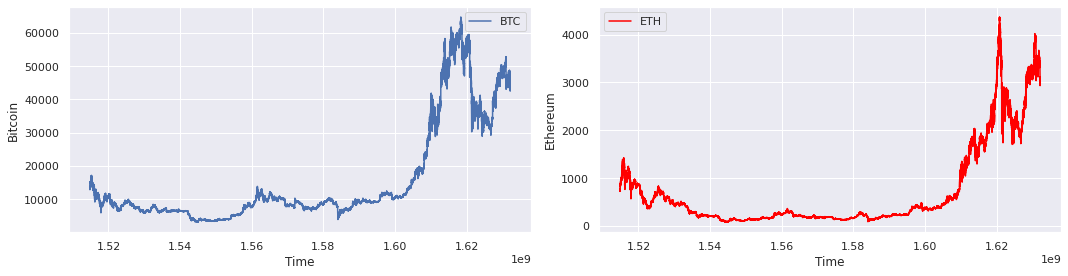

In [43]:
f = plt.figure(figsize=(15,4))

btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')

ax = f.add_subplot(121)
plt.plot(btc['Close'], label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(122)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

plt.tight_layout()
plt.show()

ビットコインとイーサリアムの終値を比較し、両者に相関関係があるかを見る。

In [44]:
totimestamp = lambda s: np.int32(time.mktime(dt.strptime(s, "%d/%m/%Y").timetuple()))

btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

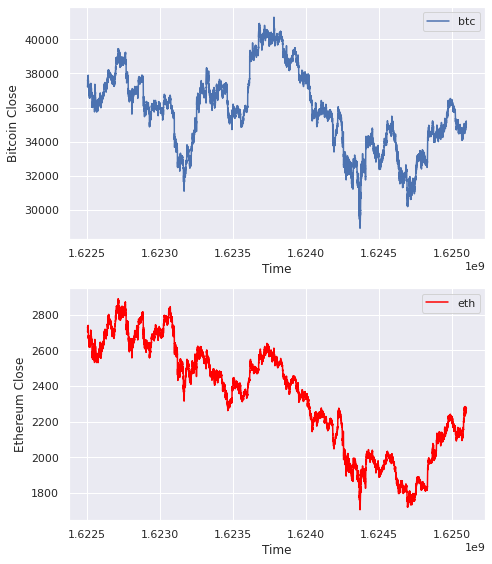

In [45]:
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(btc_mini_2021['Close'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')

ax2 = f.add_subplot(212)
ax2.plot(eth_mini_2021['Close'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Close')

plt.tight_layout()
plt.show()

さらに短い期間で見ると、潜在的な相関関係が分かる。<br>
より細かく理解するには、各資産のリターンを計算するのが良い。

ある資産の価格変動を分析するためには、価格差を扱えば良いが<br>
資産によって価格スケールが異なるため、リターンを比較することは容易ではない。<br>
これは、価格の変化率（リターン）を計算することで解決することができる。<br>
また、このリターンは投資資金の変化率と一致する。

In [46]:
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

2つの資産（ビットコインとイーサリアム）の対数リターンを可視化する。

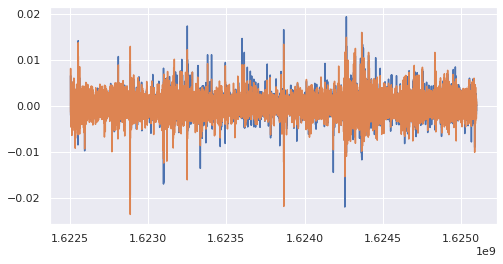

In [47]:
lret_btc = log_return(btc_mini_2021.Close)[1:]
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

2021年における、2つの資産（ビットコインとイーサリアム）の相関関係の変化を見る。

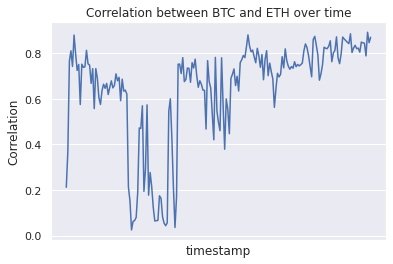

In [48]:
lret_btc_long = log_return(btc.Close)[1:]
lret_eth_long = log_return(eth.Close)[1:]
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)
two_assets = pd.concat([lret_btc_long, lret_eth_long], axis=1)

corr_time = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

corr_time.plot();
plt.xticks([])
plt.ylabel("Correlation")
plt.title("Correlation between BTC and ETH over time");

資産間の相関は高いが、変動しており、非定常性があることに気をつけなければならない。

相関行列を可視化することで、すべての資産間の相関を確認する。<br>
いくつかの資産は、他の資産よりもはるかに高いペアワイズ相関を持っていることに注意する必要がある。

In [49]:
all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = train[train["Asset_ID"]==asset_id].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad')
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

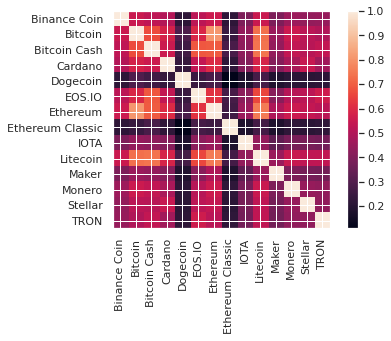

In [50]:
plt.imshow(all_assets_2021.corr());
plt.yticks(asset_details.Asset_ID.values, asset_details.Asset_Name.values);
plt.xticks(asset_details.Asset_ID.values, asset_details.Asset_Name.values, rotation='vertical');
plt.colorbar();

# Reset

Notebookのカーネルをリセットする。

In [51]:
%reset -f

# Module

In [52]:
import gc
import time
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import gresearch_crypto
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime
from lightgbm import LGBMRegressor

In [53]:
pd.set_option('display.max_colwidth', 150)

In [54]:
sns.set()

In [55]:
env = gresearch_crypto.make_env()
iter_test = env.iter_test()

# Datasets

In [56]:
df_train = pd.read_csv('../input/g-research-crypto-forecasting/train.csv') 
print(df_train.shape)
df_train.head(10)

(24236806, 10)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [57]:
pd.DataFrame([['timestamp', 'タイムスタンプ', '秒単位のUnixタイムスタンプ', 'データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）'],
              ['Asset_ID', '暗号通貨に対応する資産ID', 'asset_detailsに対応している', ''],
              ['count', '直前の1分間の取引数', '', ''],
              ['Open', 'その1分間の始値', 'データは1分ごとの各暗号資産のデータが記載されている', ''],
              ['High', 'その1分間に到達した最高価格', '', ''],
              ['Low', 'その1分間に到達した最低価格', '', ''],
              ['Close', 'その1分間の終値', '', ''],
              ['Volume', 'その1分間に売買された資産の数量', '', ''],
              ['VMAP', 'その1分間での資産の平均価格を出来高で加重したもの', '', ''],
              ['TARGET', '15分間での暗号資産の残余対数リターン', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,timestamp,タイムスタンプ,秒単位のUnixタイムスタンプ,データ期間（2018/01/01 09:01:00〜2021/09/21 09:00:00）
1,Asset_ID,暗号通貨に対応する資産ID,asset_detailsに対応している,
2,count,直前の1分間の取引数,,
3,Open,その1分間の始値,データは1分ごとの各暗号資産のデータが記載されている,
4,High,その1分間に到達した最高価格,,
5,Low,その1分間に到達した最低価格,,
6,Close,その1分間の終値,,
7,Volume,その1分間に売買された資産の数量,,
8,VMAP,その1分間での資産の平均価格を出来高で加重したもの,,
9,TARGET,15分間での暗号資産の残余対数リターン,,


In [58]:
asset_details = pd.read_csv('../input/g-research-crypto-forecasting/asset_details.csv') 
asset_details = asset_details.sort_values("Asset_ID").reset_index(drop=True)
print(asset_details.shape)
asset_details.head(10)

(14, 3)


,Asset_ID,Weight,Asset_Name
0,0,4.304065,Binance Coin
1,1,6.779922,Bitcoin
2,2,2.397895,Bitcoin Cash
3,3,4.406719,Cardano
4,4,3.555348,Dogecoin
5,5,1.386294,EOS.IO
6,6,5.894403,Ethereum
7,7,2.079442,Ethereum Classic
8,8,1.098612,IOTA
9,9,2.397895,Litecoin


In [59]:
pd.DataFrame([['Asset_id', '暗号通貨に対応する資産ID', 'trainとの結合キーになっている', ''],
              ['Weight', '重み', '', ''],
              ['Asset_name', '暗号資産名', '', '']],
              columns=['カラム', '意味', '補足1', '補足2'])

,カラム,意味,補足1,補足2
0,Asset_id,暗号通貨に対応する資産ID,trainとの結合キーになっている,
1,Weight,重み,,
2,Asset_name,暗号資産名,,


# Caution

テストデータは元の学習データに含まれているので、公開されているNotebookのLBスコアはオーバーフィッティングしているものも多い。<br>
オーバーフィッティングなしのベストLBは、今日現在で0.016となっている。これはさらに改善することができる。

# Pipeline

学習データにテストデータも含まれてしまっているので、除去する。

In [60]:
REMOVE_LB_TEST_OVERLAPPING_DATA = True

if REMOVE_LB_TEST_OVERLAPPING_DATA:
    df_train['datetime'] = pd.to_datetime(df_train['timestamp'], unit='s')
    df_train = df_train[df_train['datetime'] < '2021-06-13 00:00:00']

print(df_train.shape)
df_train.head()

(22221694, 11)


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


前処理とモデリングを行う関数を作成する。

In [61]:
# def hlco_ratio(df): 
    # return (df['High']-df['Low'])/(df['Close']-df['Open'])

def upper_shadow(df):
    return df['High'] - np.maximum(df['Close'], df['Open'])

def lower_shadow(df):
    return np.minimum(df['Close'], df['Open']) - df['Low']

def get_features(df):
    df_feat = df[['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']].copy()
    df_feat['Upper_Shadow'] = upper_shadow(df_feat)
    df_feat['Lower_Shadow'] = lower_shadow(df_feat)
    # df_feat['hlco_ration'] = hlco_ratio(df_feat)
    return df_feat

def get_Xy_and_model_for_asset(df_train, asset_id):
    df = df_train[df_train["Asset_ID"] == asset_id]
    
    df_proc = get_features(df)
    df_proc['y'] = df['Target']
    df_proc = df_proc.dropna(how="any")
    
    X = df_proc.drop("y", axis=1)
    y = df_proc["y"]
    
    model = LGBMRegressor(n_estimators=10)
    model.fit(X, y)
    return X, y, model

暗号資産ごとに X, y, model を格納していく。

In [62]:
Xs = {}
ys = {}
models = {}

for asset_id, asset_name in zip(asset_details['Asset_ID'], asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    X, y, model = get_Xy_and_model_for_asset(df_train, asset_id)    
    Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model

Training model for Binance Coin     (ID=0 )
Training model for Bitcoin          (ID=1 )
Training model for Bitcoin Cash     (ID=2 )
Training model for Cardano          (ID=3 )
Training model for Dogecoin         (ID=4 )
Training model for EOS.IO           (ID=5 )
Training model for Ethereum         (ID=6 )
Training model for Ethereum Classic (ID=7 )
Training model for IOTA             (ID=8 )
Training model for Litecoin         (ID=9 )
Training model for Maker            (ID=10)
Training model for Monero           (ID=11)
Training model for Stellar          (ID=12)
Training model for TRON             (ID=13)


In [63]:
# del df_train
# gc.collect()

# Prediction

複数のモデルを、暗号資産ごとに使い分けて予測をする。<br>
df_pred には、sample_prediction が入っている。

In [64]:
all_df_test = []

for i, (df_test, df_pred) in enumerate(iter_test):
    for j, row in df_test.iterrows():
        
        model = models[row['Asset_ID']]
        x_test = get_features(row)
        y_pred = model.predict([x_test])[0]
        
        df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = y_pred
        
        if i == 0 and j == 0:
            display(x_test)

    if i == 0:
        display(df_pred)
    all_df_test.append(df_test)

    env.predict(df_pred)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.


Count             1201.000000
Open                 1.478556
High                 1.486030
Low                  1.478000
Close                1.483681
Volume          654799.561103
VWAP                 1.481439
Upper_Shadow         0.002349
Lower_Shadow         0.000556
Name: 0, dtype: float64

,row_id,Target
0,0,-0.000031
1,1,-0.000002
2,2,0.000020
3,3,0.000013
4,4,0.000032
5,5,-0.000004
6,6,0.000072
7,7,-0.000007
8,8,-0.000007
9,9,-0.000017


# Overlap

学習データとテストデータで、重複している期間がないかを確認する。

In [65]:
df_test = pd.concat(all_df_test)
df_test['datetime'] = pd.to_datetime(df_test['timestamp'], unit='s')
df_train['datetime'] = pd.to_datetime(df_train['timestamp'], unit='s')

In [66]:
print('Train End:', df_train['datetime'].max())
print('Test Start:', df_test['datetime'].max())

Train End: 2021-06-12 23:59:00
Test Start: 2021-06-13 00:03:00


# References

### EDA

・[Tutorial to the G-Research Crypto Competition](https://www.kaggle.com/cstein06/tutorial-to-the-g-research-crypto-competition)<br>
・[G-Research Plots + EDA](https://www.kaggle.com/odins0n/g-research-plots-eda)<br>

### Pipeline

・[G-Research- Starter LGBM Pipeline](https://www.kaggle.com/julian3833/g-research-starter-lgbm-pipeline)<br>
・[G-Research- Using the overlap fully [LB=0.99]](https://www.kaggle.com/icaram/g-research-using-the-overlap-fully-lb-0-99)<br>